# Introduction

In [2]:
import requests
from bs4 import BeautifulSoup
import datetime
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Import data

I will use each Billboard's top 100 emerging artists list, as published on a weekly basis from 2018 to early 2020, to generate a list of several hundred artists whose tour itineraries I will pull from Songkick.

## Scrape list of emerging artists from Billboard
### Create list of all dates in 2018, 2019, and early 2020 that fall on a Saturday (for concatenation with URL)

In [13]:
# SOURCE:  https://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python
# compile list of every saturday in 2019 and Jan-Feb 2020, in Year-Month-Day format

weeks = []

start = datetime.datetime.strptime("2018-01-06", "%Y-%m-%d")
end = datetime.datetime.strptime("2020-02-29", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(weeks=x) for x in range(0, (end-start).days)]

for date in date_generated:
    weeks.append(date.strftime("%Y-%m-%d"))
    
weeks = weeks[0:113]

In [14]:
print(weeks[0])
print(weeks[112])

2018-01-06
2020-02-29


### Scrape names of top 50 emerging artists for each week in date list, removing duplicates

In [18]:
artists_scrape = []

for w in weeks:
    url = 'https://www.billboard.com/charts/emerging-artists/' + w
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    artistsoup = soup.find_all('div', class_='item-details__title')
    for a in artistsoup:
        name = a.get_text()
        if name in artists_scrape:
            continue
        else:
            artists_scrape.append(name)

In [19]:
len(artists_scrape)

194

In [48]:
# MANUAL COPY OF ARTIST LIST, WITH KAREN GIBSON REMOVED (HER CHOIR PERFORMANCE AT HARRY AND MEGAN'S WEDDING 
# WENT VIRAL, RESULTING IN HER CHART PLACEMENT ON BILLBOARDS EMERGING ARTISTS LIST)

artistlist = ['LANCO', 'Russell Dickerson', 'MAX', 'Walker Hayes', 'Lil Xan', 'Zacari', 'YBN Nahmir', 'Trippie Redd',
 'Devin Dawson', 'GoldLink', 'Zendaya', 'Jacquees', 'Tay-K', 'Logan Paul', 'Lil Baby', 'Tee Grizzley', 'Lauv',
 'Louis Tomlinson', 'Lil Skies', 'Sofi Tukker', 'Dylan Scott', 'Christian Nodal', 'Big Shaq', 'Alice Merton',
 'Swae Lee', 'High Valley', 'Bhad Bhabie', 'Jordan Davis', 'Anitta', 'Alan Walker', 'Greta Van Fleet', 'Wanna One',
 'The Revivalists', 'AJR', 'YFN Lucci', 'HRVY', 'Famous Dex', 'Carly Pearce', "Auli'i Cravalho", 'Yung Bleu',
 'Natti Natasha', 'Keala Settle', 'TakeOff', 'DeJ Loaf', 'Nego do Borel', 'MONSTA X', 'Loren Allred', 'Sabrina Carpenter',
 'Alta Consigna', "Rag'n'Bone Man", 'The Bellas', 'Blac Youngsta', 'Jeff Rosenstock', 'Andra Day', 'Just Chase',
 'Lexy Panterra', 'Chris Lane', 'watt', 'Morgan Wallen', 'Sebastian Yatra', 'Tauren Wells', 'Nacho', 'Billie Eilish',
 'Rita Ora', 'Watain', 'Layton Greene', "Derez De'Shon", 'Landon Cube', 'Anderson East', 'Avatar', 'Typhoon',
 'Tonight Alive', 'Ansel Elgort', 'Bazzi', 'Ty Tabor', 'GENTRI', 'Rich The Kid', 'EDEN', 'Cane Hill', 'Caleb + Kelsey',
 'tUnE-YaRdS', 'Queen Naija', 'Jason Manns', 'H.E.R.', 'Bad Wolves', 'Bahamas', 'Moon Taxi', 'Cory Asbury', 'Waterparks',
 'Ty Segall', 'Red Velvet', 'Evidence', 'Mike Shinoda', 'Tiny Moving Parts', 'Kali Uchis', 'Sleeping Giant', 'The Dangerous Summer',
 'Madison Beer', 'Rhye', "Why Don't We", 'Bishop Briggs', 'The Wood Brothers', 'Jon Langston', 'SOB X RBE', 'The Wombats',
 'Saudi', 'Good Tiger', 'DJ Kass', 'Jorja Smith', 'Anne-Marie', 'Jordan Feliz', "I'm With Her", 'Car Seat Headrest',
 'Slaves', 'Normani', 'The Plot In You', 'Superchunk', '6LACK', 'American Nightmare', 'Pianos Become The Teeth', 'John Corabi',
 'Agust D', 'j-hope', 'Dessa', 'Turnstile', 'Big Smo', 'Screaming Females', 'Phonte', 'Tracey Thorn', 'Lucius',
 'Calum Scott', 'Titus Andronicus', 'Joyner Lucas', 'Superorganism', 'The Band Of Heathens', 'Moose Blood', 'Trixie Mattel',
 'Stefflon Don', 'lovelytheband', 'PRhyme', 'Adam Calhoun', 'NCT', 'Rich Homie Quan', 'Hot Snakes', 'Ella Mai',
 'Saweetie', 'Rivers Of Nihil', 'Chiquis Rivera', 'DOROTHY', 'Todrick Hall', 'Paul Thorn', 'Dynamite Dylan', 'Lissie',
 'Ashley McBryde', 'Light The Torch', 'The Voidz', 'Gesaffelstein', 'Red Sun Rising', 'King Gizzard And The Lizard Wizard', 'Jukebox The Ghost',
 'Dr. Octagon', 'Allen Stone', 'Hop Along', 'Alina Baraz', 'The Aquabats!', 'Unknown Mortal Orchestra', 'Wye Oak',
 'Poo Bear', 'LEDGER', 'Prof', 'El Chombo', 'Raymix', 'Nekrogoblikon', 'From Ashes To New', 'Drew Love', 'TesseracT',
 'Morgan Evans', 'My Silent Bravery', 'Tammy Rivera', 'Mason Ramsey', 'Pryor Baird', 'Britton Buchanan', 'NCT 127',
 'Stray Kids', 'Frank Turner', 'Trampled By Turtles', 'Shakey Graves', 'Black Moth Super Rainbow', 'Wolfine', 'Juice WRLD',
 'Slim Jxmmi', 'The Word Alive', 'Kyla Jade', 'Drake White', 'Brynn Cartelli', 'Kaleb Lee', 'Brent Cobb', 'Joji',
 'Spensha Baker', 'Lindsay Ell', 'Two Feet', 'Sheku Kanneh-Mason', 'Maddie Poppe', 'Kris Wu', 'Parquet Courts',
 'Iration', 'Dana Fuchs', 'Trent Harmon', 'Caleb Lee Hutchinson', 'Gabby Barrett', 'Gunna', 'Influence Music',
 'Jackson Wang', 'Tyla Yaweh', 'Graveyard', 'Jude Demorest', 'Skepta', 'DJ SPINKING']

In [49]:
len(artistlist)

218

## Scrape historical live event data, by artist, from Songkick
### Format artist list for URL concatenation

In [44]:
artists = []

for a in artistlist:
    newa = a.replace(' ', '+')
    artists.append(newa)
    
artists

['LANCO',
 'Russell+Dickerson',
 'MAX',
 'Walker+Hayes',
 'Lil+Xan',
 'Zacari',
 'YBN+Nahmir',
 'Trippie+Redd',
 'Devin+Dawson',
 'GoldLink',
 'Zendaya',
 'Jacquees',
 'Tay-K',
 'Logan+Paul',
 'Lil+Baby',
 'Tee+Grizzley',
 'Lauv',
 'Louis+Tomlinson',
 'Lil+Skies',
 'Sofi+Tukker',
 'Dylan+Scott',
 'Christian+Nodal',
 'Big+Shaq',
 'Alice+Merton',
 'Swae+Lee',
 'High+Valley',
 'Bhad+Bhabie',
 'Jordan+Davis',
 'Anitta',
 'Alan+Walker',
 'Greta+Van+Fleet',
 'Wanna+One',
 'The+Revivalists',
 'AJR',
 'YFN+Lucci',
 'HRVY',
 'Famous+Dex',
 'Carly+Pearce',
 "Auli'i+Cravalho",
 'Yung+Bleu',
 'Natti+Natasha',
 'Keala+Settle',
 'TakeOff',
 'DeJ+Loaf',
 'Nego+do+Borel',
 'MONSTA+X',
 'Loren+Allred',
 'Sabrina+Carpenter',
 'Alta+Consigna',
 "Rag'n'Bone+Man",
 'The+Bellas',
 'Blac+Youngsta',
 'Jeff+Rosenstock',
 'Andra+Day',
 'Just+Chase',
 'Lexy+Panterra',
 'Chris+Lane',
 'watt',
 'Morgan+Wallen',
 'Sebastian+Yatra',
 'Tauren+Wells',
 'Nacho',
 'Billie+Eilish',
 'Rita+Ora',
 'Watain',
 'Layton+Greene

### Create function that scrapes Songkick for past events of a single artist

In [191]:
def pull_events(artist):

    eventslist = []

    for n in range(1,21):
        url = 'https://www.songkick.com/search?page='+str(n)+'&per_page=10&query='+artist+'&type=past'
        page = requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')

        events = soup.find_all('li', class_='concert event')
        for e in events:
            date = e.find('time').get_text()
            location = e.find('p', class_='location').get_text()
            tup = (artist, date, location)
            eventslist.append(tup)
    
    return eventslist

### Loop scraping function to compile historical events for all emerging artists in our list

In [194]:
allevents = []
for a in artists:
    artistevents = pull_events(a)
    allevents.append(artistevents)
    print(a)

LANCO
Russell+Dickerson
MAX
Walker+Hayes
Lil+Xan
Zacari
YBN+Nahmir
Trippie+Redd
Devin+Dawson
GoldLink
Zendaya
Jacquees
Tay-K
Logan+Paul
Lil+Baby
Tee+Grizzley
Lauv
Louis+Tomlinson
Lil+Skies
Sofi+Tukker
Dylan+Scott
Christian+Nodal
Big+Shaq
Alice+Merton
Swae+Lee
High+Valley
Bhad+Bhabie
Jordan+Davis
Anitta
Alan+Walker
Greta+Van+Fleet
Wanna+One
The+Revivalists
AJR
YFN+Lucci
HRVY
Famous+Dex
Carly+Pearce
Auli'i+Cravalho
Yung+Bleu
Natti+Natasha
Keala+Settle
TakeOff
DeJ+Loaf
Nego+do+Borel
MONSTA+X
Loren+Allred
Sabrina+Carpenter
Alta+Consigna
Rag'n'Bone+Man
The+Bellas
Blac+Youngsta
Jeff+Rosenstock
Andra+Day
Just+Chase
Lexy+Panterra
Chris+Lane
watt
Morgan+Wallen
Sebastian+Yatra
Tauren+Wells
Nacho
Billie+Eilish
Rita+Ora
Watain
Layton+Greene
Derez+De'Shon
Landon+Cube
Anderson+East
Avatar
Typhoon
Tonight+Alive
Ansel+Elgort
Bazzi
Ty+Tabor
GENTRI
Rich+The+Kid
EDEN
Cane+Hill
Caleb+++Kelsey
tUnE-YaRdS
Queen+Naija
Jason+Manns
H.E.R.
Bad+Wolves
Bahamas
Moon+Taxi
Cory+Asbury
Waterparks
Ty+Segall
Red+Velvet

### Preliminary cleaning before saving data locally

In [195]:
# LIST IS CURRENTLY GROUPED BY EACH ARTIST; WE NEED EACH EVENT TO BE ITS OWN ROW

len(allevents)

219

In [204]:
# UNRAVELING THE LIST TO MAKE EACH EVENT FOR EACH ARTIST ITS OWN ROW

allevents_long = []
for i in allevents:
    for j in i:
        allevents_long.append(j)

In [206]:
len(allevents_long)

26476

In [208]:
df = pd.DataFrame(allevents_long)
df.head()

,0,1,2
0,LANCO,Wednesday 16 January 2019,"\n The Depot, Salt Lake City, UT, US\n"
1,LANCO,Friday 18 January 2019,"\n Showbox SoDo, Seattle, WA, US\n"
2,LANCO,Friday 13 March 2020,"\n Joe's Live Rosemont, Rosemont, IL, US\..."
3,LANCO,Saturday 19 January 2019,"\n Wonder Ballroom, Portland, OR, US\n"
4,LANCO,Saturday 15 February 2020,"\n Bluestone, Columbus, OH, US\n"


In [211]:
# SAVING DATAFRAME AS A CSV FILE 

df.to_csv('data/scrape_long.csv', index=False)

In [4]:
df = pd.read_csv('data/scrape_long.csv')

In [89]:
df.rename(columns={'0':'artist', '1':'date', '2':'location'}, inplace=True)
df.head()

,artist,date,location
0,LANCO,Wednesday 16 January 2019,"\n The Depot, Salt Lake City, UT, US\n"
1,LANCO,Friday 18 January 2019,"\n Showbox SoDo, Seattle, WA, US\n"
2,LANCO,Friday 13 March 2020,"\n Joe's Live Rosemont, Rosemont, IL, US\..."
3,LANCO,Saturday 19 January 2019,"\n Wonder Ballroom, Portland, OR, US\n"
4,LANCO,Saturday 15 February 2020,"\n Bluestone, Columbus, OH, US\n"


## Pull artist genre classifiers from Spotify API

In [7]:
auth_manager = SpotifyClientCredentials(client_id='ea51f4db67cf4a808dde1a9851ccd19e', 
                                        client_secret='048f383d092747fe8b9d3aa6914f0a3c')
sp = spotipy.Spotify(auth_manager=auth_manager)

### Retrieve artist URI codes

In [24]:
# Query spotipy for all artist URI codes

uri_list = []

for a in artistlist:
    result = sp.search(a)
    try:
        artist_uri = result['tracks']['items'][0]['artists'][0]['uri']
        uri_list.append(artist_uri)
    except:
        print(a)
        pass

Karen Gibson & The Kingdom Choir


In [26]:
len(uri_list)

218

### Retrieve artist genres using URI codes

In [36]:
# Use artist URI codes to query spotipy for each artist's associated genres

genrelist = []

for u in uri_list:
    genres = sp.artist(u)['genres']
    genrelist.append(genres)

In [37]:
len(genrelist)

218

In [46]:
d = {'artist':artists, 'genre':genrelist}
genre_df = pd.DataFrame(d)
genre_df.head()

,artist,genre
0,LANCO,"[contemporary country, country pop]"
1,Russell+Dickerson,"[contemporary country, country, country road, ..."
2,MAX,"[dance pop, electropop, pop, post-teen pop, vi..."
3,Walker+Hayes,"[contemporary country, country, country pop, c..."
4,Lil+Xan,"[emo rap, underground hip hop]"


In [53]:
genre_df

,artist,genre
0,LANCO,"[contemporary country, country pop]"
1,Russell+Dickerson,"[contemporary country, country, country road, ..."
2,MAX,"[dance pop, electropop, pop, post-teen pop, vi..."
3,Walker+Hayes,"[contemporary country, country, country pop, c..."
4,Lil+Xan,"[emo rap, underground hip hop]"
...,...,...
213,Tyla+Yaweh,"[cali rap, melodic rap, pop rap, rap, trap]"
214,Graveyard,"[dance pop, electropop, etherpop, indie poptim..."
215,Jude+Demorest,"[pop, pop r&b, post-teen pop, r&b, trap queen]"
216,Skepta,"[hip hop, ohio hip hop, rap]"


In [54]:
genrelist

[['contemporary country', 'country pop'],
 ['contemporary country', 'country', 'country road', 'modern country rock'],
 ['dance pop', 'electropop', 'pop', 'post-teen pop', 'viral pop'],
 ['contemporary country',
  'country',
  'country pop',
  'country road',
  'modern country rock'],
 ['emo rap', 'underground hip hop'],
 ['conscious hip hop', 'hip hop', 'rap', 'west coast rap'],
 ['alabama rap', 'pop rap', 'rap', 'trap', 'vapor trap', 'viral rap'],
 ['emo rap', 'miami hip hop'],
 ['contemporary country', 'country pop', 'modern country rock'],
 ['alternative r&b',
  'dmv rap',
  'hip hop',
  'indie soul',
  'r&b',
  'rap',
  'underground hip hop'],
 ['underground hip hop'],
 ['atl hip hop',
  'pop',
  'pop r&b',
  'pop rap',
  'r&b',
  'rap',
  'urban contemporary'],
 ['cali rap', 'dfw rap', 'rap', 'trap', 'underground hip hop', 'vapor trap'],
 ['social media pop'],
 ['canadian hip hop',
  'canadian pop',
  'hip hop',
  'pop rap',
  'rap',
  'toronto rap'],
 ['detroit hip hop',
  'detr

### Manual assignment of single genre to each artist

In [73]:
genre1 = ['country', 'country', 'pop', 'country', 'hiphop', 'hiphop', 'hiphop', 'hiphop', 'country', 'hiphop', 'hiphop',
 'hiphop', 'hiphop', 'pop', 'hiphop', 'hiphop', 'pop', 'pop', 'hiphop', 'pop', 'country', 'latin', 'hiphop',
 'blank', 'country', 'country', 'pop', 'country', 'latin', 'pop', 'rock', 'pop', 'rock', 'rock', 'hiphop', 'pop',
 'hiphop', 'country', 'blank', 'hiphop', 'latin', 'blank', 'hiphop', 'hiphop', 'latin', 'pop', 'blank', 'pop',
 'latin', 'hiphop', 'blank', 'hiphop', 'rock', 'hiphop', 'hiphop', 'blank', 'country', 'blank', 'country',
 'latin', 'faith', 'latin', 'pop', 'hiphop', 'rock', 'hiphop', 'blank', 'hiphop', 'rock', 'hiphop', 'rock', 'pop',
 'pop', 'pop', 'blank', 'blank', 'hiphop', 'hiphop', 'rock', 'faith', 'pop', 'pop', 'blank', 'pop', 'rock', 'rock',
 'rock', 'faith', 'rock', 'rock', 'pop', 'faith', 'hiphop', 'rock', 'latin', 'blank', 'rock', 'pop', 'hiphop',
 'country', 'pop', 'rock', 'country', 'hiphop', 'rock', 'hiphop', 'rock', 'latin', 'pop', 'pop', 'faith', 'rock',
 'rock', 'blank', 'pop', 'rock', 'pop', 'hiphop', 'rock', 'rock', 'blank', 'hiphop', 'pop', 'hiphop', 'blank',
 'rock', 'rock', 'hiphop', 'hiphop', 'pop', 'pop', 'rock', 'hiphop', 'pop', 'rock', 'rock', 'country', 'latin', 'pop',
 'hiphop', 'hiphop', 'pop', 'hiphop', 'rock', 'pop', 'hiphop', 'rock', 'latin', 'rock', 'pop', 'country', 'pop',
 'pop', 'country', 'rock', 'rock', 'pop', 'rock', 'rock', 'rock', 'hiphop', 'hiphop', 'blank', 'pop', 'rock',
 'hiphop', 'pop', 'pop', 'faith', 'hiphop', 'latin', 'latin', 'rock', 'rock', 'pop', 'rock', 'country', 'rock',
 'hiphop', 'country', 'blank', 'blank', 'pop', 'pop', 'rock', 'rock', 'rock', 'hiphop', 'latin', 'hiphop', 'hiphop',
 'rock', 'blank', 'country', 'blank', 'blank', 'rock', 'hiphop', 'faith', 'country', 'pop', 'blank', 'blank', 'hiphop',
 'rock', 'rock', 'blank', 'country', 'blank', 'country', 'hiphop', 'faith', 'pop', 'hiphop', 'pop', 'pop',
 'hiphop', 'hiphop']

In [74]:
genre1 = pd.DataFrame(genre1)
genre1_df = pd.concat([genre_df, genre1], axis=1)
genre1_df.head()

,artist,genre,0
0,LANCO,"[contemporary country, country pop]",country
1,Russell+Dickerson,"[contemporary country, country, country road, ...",country
2,MAX,"[dance pop, electropop, pop, post-teen pop, vi...",pop
3,Walker+Hayes,"[contemporary country, country, country pop, c...",country
4,Lil+Xan,"[emo rap, underground hip hop]",hiphop


In [77]:
genre1_df.rename(columns={'genre':'genre_complex', 0:'genre'}, inplace=True)
genre1_df.head()

,artist,genre_complex,genre
0,LANCO,"[contemporary country, country pop]",country
1,Russell+Dickerson,"[contemporary country, country, country road, ...",country
2,MAX,"[dance pop, electropop, pop, post-teen pop, vi...",pop
3,Walker+Hayes,"[contemporary country, country, country pop, c...",country
4,Lil+Xan,"[emo rap, underground hip hop]",hiphop


In [84]:
# Dropping approx 20 artists from the list who didn't fit into the final set of mainstream genre groupings

df_gen = genre1_df[genre1_df['genre'] != 'blank']

In [85]:
df_gen

,artist,genre_complex,genre
0,LANCO,"[contemporary country, country pop]",country
1,Russell+Dickerson,"[contemporary country, country, country road, ...",country
2,MAX,"[dance pop, electropop, pop, post-teen pop, vi...",pop
3,Walker+Hayes,"[contemporary country, country, country pop, c...",country
4,Lil+Xan,"[emo rap, underground hip hop]",hiphop
...,...,...,...
213,Tyla+Yaweh,"[cali rap, melodic rap, pop rap, rap, trap]",hiphop
214,Graveyard,"[dance pop, electropop, etherpop, indie poptim...",pop
215,Jude+Demorest,"[pop, pop r&b, post-teen pop, r&b, trap queen]",pop
216,Skepta,"[hip hop, ohio hip hop, rap]",hiphop


## Combine genre and event data into one dataframe

In [90]:
df_merge = pd.merge(df, df_gen, on='artist', how='inner')

In [92]:
df_merge.head()

,artist,date,location,genre_complex,genre
0,LANCO,Wednesday 16 January 2019,"\n The Depot, Salt Lake City, UT, US\n","[contemporary country, country pop]",country
1,LANCO,Friday 18 January 2019,"\n Showbox SoDo, Seattle, WA, US\n","[contemporary country, country pop]",country
2,LANCO,Friday 13 March 2020,"\n Joe's Live Rosemont, Rosemont, IL, US\...","[contemporary country, country pop]",country
3,LANCO,Saturday 19 January 2019,"\n Wonder Ballroom, Portland, OR, US\n","[contemporary country, country pop]",country
4,LANCO,Saturday 15 February 2020,"\n Bluestone, Columbus, OH, US\n","[contemporary country, country pop]",country


In [93]:
df_merge.shape

(24651, 5)

In [94]:
df_merge.to_csv('data/merged.csv', index=False)

# Data cleaning
## Isolate city names

In [2]:
df_merge = pd.read_csv('data/merged.csv')

In [3]:
split_data = df_merge["location"].str.split(", ")
data = split_data.to_list()
loc_df = pd.DataFrame(data)
loc_df.head()

,0,1,2,3,4,5
0,\n The Depot,Salt Lake City,UT,US\n,None,None
1,\n Showbox SoDo,Seattle,WA,US\n,None,None
2,\n Joe's Live Rosemont,Rosemont,IL,US\n,None,None
3,\n Wonder Ballroom,Portland,OR,US\n,None,None
4,\n Bluestone,Columbus,OH,US\n,None,None


In [4]:
len(loc_df)

24651

In [5]:
loc_df[5].value_counts()

US\n            16
Canada\n         2
Name: 5, dtype: int64

In [6]:
loc_df[loc_df[4] is True]

0                   \n      The Depot
1                \n      Showbox SoDo
2         \n      Joe's Live Rosemont
3             \n      Wonder Ballroom
4                   \n      Bluestone
                     ...             
24646    \n      The Wellmont Theater
24647                \n      S.O.B.'s
24648            \n      Tammany Hall
24649       \n      Amadeus Nightclub
24650            \n      Webster Hall
Name: 0, Length: 24651, dtype: object

### Formatting main location df

In [7]:
# 716 events had 2 or 3 listed items for the venue, offsetting the columns 
# where the city and country info show up.  Therefore, these must be handled separately

loc_df_4col = loc_df[loc_df[4].isnull()]
len(loc_df_4col)

23935

In [8]:
loc_df_4col = loc_df_4col.drop(columns = [4, 5], axis=1)
loc_df_4col.rename(columns={0:'venue', 1:'city', 2:'state', 3:'country'}, inplace=True)
loc_df_4col.head()

,venue,city,state,country
0,\n The Depot,Salt Lake City,UT,US\n
1,\n Showbox SoDo,Seattle,WA,US\n
2,\n Joe's Live Rosemont,Rosemont,IL,US\n
3,\n Wonder Ballroom,Portland,OR,US\n
4,\n Bluestone,Columbus,OH,US\n


### Formatting rows with offset city information

#### 1 column offset

In [9]:
loc_df_5and6col = loc_df[~loc_df[4].isnull()]

In [10]:
loc_df_5col = loc_df_5and6col[loc_df_5and6col[5].isnull()]
loc_df_5col

,0,1,2,3,4,5
63,\n GIANT Center,Hershey Park,Hershey,PA,US\n,None
72,\n EagleBank Arena,George Mason University,Fairfax,VA,US\n,None
77,\n Petersen Events Center,University of Pittsburgh,Pittsburgh,PA,US\n,None
109,\n Atlanta Room,Smith's Olde Bar,Atlanta,GA,US\n,None
114,\n Thompson-Boling Arena,University of Tennessee,Knoxville,TN,US\n,None
...,...,...,...,...,...,...
24113,\n The Ballroom,Warehouse Live,Houston,TX,US\n,None
24151,\n LIV Nightclub,Fontainebleau,Miami Beach,FL,US\n,None
24308,\n Ballroom,Floridan Palace Hotel,Tampa,FL,US\n,None
24387,\n Rumsey Playfield,Central Park,New York (NYC),NY,US\n,None


In [11]:
loc_df_5col = loc_df_5col.drop(columns=[1,5])
loc_df_5col.rename(columns={0:'venue', 2:'city', 3:'state', 4:'country'}, inplace=True)
loc_df_5col

,venue,city,state,country
63,\n GIANT Center,Hershey,PA,US\n
72,\n EagleBank Arena,Fairfax,VA,US\n
77,\n Petersen Events Center,Pittsburgh,PA,US\n
109,\n Atlanta Room,Atlanta,GA,US\n
114,\n Thompson-Boling Arena,Knoxville,TN,US\n
...,...,...,...,...
24113,\n The Ballroom,Houston,TX,US\n
24151,\n LIV Nightclub,Miami Beach,FL,US\n
24308,\n Ballroom,Tampa,FL,US\n
24387,\n Rumsey Playfield,New York (NYC),NY,US\n


#### 2 column offset

In [12]:
loc_df_6col = loc_df_5and6col[~loc_df_5and6col[5].isnull()]
loc_df_6col

,0,1,2,3,4,5
402,\n Red Room,Cafe 939,Berklee College of Music,Boston,MA,US\n
455,\n Red Room,Cafe 939,Berklee College of Music,Boston,MA,US\n
6078,\n Red Room,Cafe 939,Berklee College of Music,Boston,MA,US\n
8090,\n The Sett,Union South,University of Wisconsin,Madison,WI,US\n
9853,\n The Capitol Theatre,Port Chester,NY,Port Chester,NY,US\n
10426,\n Red Room,Cafe 939,Berklee College of Music,Boston,MA,US\n
11558,\n Myer Horowitz Theatre,SUB,University of Alberta,Edmonton,AB,Canada\n
13558,\n Smothers Theatre,Lisa Smith Wengler Center for the Arts,Pepperdine University,Malibu,CA,US\n
15548,\n Red Room,Cafe 939,Berklee College of Music,Boston,MA,US\n
16166,\n Spirits,Food,and Friends,Alexandria,LA,US\n


In [13]:
loc_df_6col = loc_df_6col.drop(columns=[1,2])
loc_df_6col.rename(columns={0:'venue', 3:'city', 4:'state', 5:'country'}, inplace=True)
loc_df_6col

,venue,city,state,country
402,\n Red Room,Boston,MA,US\n
455,\n Red Room,Boston,MA,US\n
6078,\n Red Room,Boston,MA,US\n
8090,\n The Sett,Madison,WI,US\n
9853,\n The Capitol Theatre,Port Chester,NY,US\n
10426,\n Red Room,Boston,MA,US\n
11558,\n Myer Horowitz Theatre,Edmonton,AB,Canada\n
13558,\n Smothers Theatre,Malibu,CA,US\n
15548,\n Red Room,Boston,MA,US\n
16166,\n Spirits,Alexandria,LA,US\n


### Combine all location data back into one dataframe and merge with rest of data

#### Combine location data into one dataframe, sorted by original index #

In [14]:
comb = pd.concat([loc_df_5col, loc_df_6col], sort=False).sort_index()
comb

,venue,city,state,country
63,\n GIANT Center,Hershey,PA,US\n
72,\n EagleBank Arena,Fairfax,VA,US\n
77,\n Petersen Events Center,Pittsburgh,PA,US\n
109,\n Atlanta Room,Atlanta,GA,US\n
114,\n Thompson-Boling Arena,Knoxville,TN,US\n
...,...,...,...,...
24113,\n The Ballroom,Houston,TX,US\n
24151,\n LIV Nightclub,Miami Beach,FL,US\n
24308,\n Ballroom,Tampa,FL,US\n
24387,\n Rumsey Playfield,New York (NYC),NY,US\n


In [15]:
combo = pd.concat([loc_df_4col, comb], sort=False).sort_index()
combo

,venue,city,state,country
0,\n The Depot,Salt Lake City,UT,US\n
1,\n Showbox SoDo,Seattle,WA,US\n
2,\n Joe's Live Rosemont,Rosemont,IL,US\n
3,\n Wonder Ballroom,Portland,OR,US\n
4,\n Bluestone,Columbus,OH,US\n
...,...,...,...,...
24646,\n The Wellmont Theater,Montclair,NJ,US\n
24647,\n S.O.B.'s,Manhattan,NY,US\n
24648,\n Tammany Hall,New York (NYC),NY,US\n
24649,\n Amadeus Nightclub,Queens,NY,US\n


#### Combine location data with artist and genre data

In [16]:
df_cities = pd.concat([df_merge, combo], axis=1)
df_cities.head()

,artist,date,location,genre_complex,genre,venue,city,state,country
0,LANCO,Wednesday 16 January 2019,"\n The Depot, Salt Lake City, UT, US\n","['contemporary country', 'country pop']",country,\n The Depot,Salt Lake City,UT,US\n
1,LANCO,Friday 18 January 2019,"\n Showbox SoDo, Seattle, WA, US\n","['contemporary country', 'country pop']",country,\n Showbox SoDo,Seattle,WA,US\n
2,LANCO,Friday 13 March 2020,"\n Joe's Live Rosemont, Rosemont, IL, US\...","['contemporary country', 'country pop']",country,\n Joe's Live Rosemont,Rosemont,IL,US\n
3,LANCO,Saturday 19 January 2019,"\n Wonder Ballroom, Portland, OR, US\n","['contemporary country', 'country pop']",country,\n Wonder Ballroom,Portland,OR,US\n
4,LANCO,Saturday 15 February 2020,"\n Bluestone, Columbus, OH, US\n","['contemporary country', 'country pop']",country,\n Bluestone,Columbus,OH,US\n


## EDA on list of cities

#### Filter for US cities

In [29]:
df_cities['country'].value_counts()

US\n                    18417
Canada\n                  974
Australia\n               360
UK\n                       74
Germany\n                  36
Denmark\n                  17
Netherlands\n              17
Republic Of\n              12
New Zealand\n               8
Ireland\n                   6
Sweden\n                    4
Brazil\n                    3
France\n                    3
Norway\n                    2
Japan\n                     2
Malaysia\n                  2
Monaco\n                    1
Macedonia\n                 1
China\n                     1
Czech Republic\n            1
Italy\n                     1
Switzerland\n               1
Portugal\n                  1
Name: country, dtype: int64

In [33]:
df_uscities = df_cities[df_cities['country'].str.contains("US", na=False)]
df_uscities['country'].value_counts()

US\n        18417
Name: country, dtype: int64

In [34]:
df_uscities

,artist,date,location,genre_complex,genre,venue,city,state,country
0,LANCO,Wednesday 16 January 2019,"\n The Depot, Salt Lake City, UT, US\n","['contemporary country', 'country pop']",country,\n The Depot,Salt Lake City,UT,US\n
1,LANCO,Friday 18 January 2019,"\n Showbox SoDo, Seattle, WA, US\n","['contemporary country', 'country pop']",country,\n Showbox SoDo,Seattle,WA,US\n
2,LANCO,Friday 13 March 2020,"\n Joe's Live Rosemont, Rosemont, IL, US\...","['contemporary country', 'country pop']",country,\n Joe's Live Rosemont,Rosemont,IL,US\n
3,LANCO,Saturday 19 January 2019,"\n Wonder Ballroom, Portland, OR, US\n","['contemporary country', 'country pop']",country,\n Wonder Ballroom,Portland,OR,US\n
4,LANCO,Saturday 15 February 2020,"\n Bluestone, Columbus, OH, US\n","['contemporary country', 'country pop']",country,\n Bluestone,Columbus,OH,US\n
...,...,...,...,...,...,...,...,...,...
24646,DJ+SPINKING,Saturday 12 January 2019,"\n The Wellmont Theater, Montclair, NJ, U...","['melodic rap', 'pop rap', 'rap', 'trap']",hiphop,\n The Wellmont Theater,Montclair,NJ,US\n
24647,DJ+SPINKING,Thursday 14 May 2015,"\n S.O.B.'s, Manhattan, NY, US\n","['melodic rap', 'pop rap', 'rap', 'trap']",hiphop,\n S.O.B.'s,Manhattan,NY,US\n
24648,DJ+SPINKING,Friday 02 November 2012,"\n Tammany Hall, New York (NYC), NY, US\n...","['melodic rap', 'pop rap', 'rap', 'trap']",hiphop,\n Tammany Hall,New York (NYC),NY,US\n
24649,DJ+SPINKING,Saturday 26 October 2019,"\n Amadeus Nightclub, Queens, NY, US\n","['melodic rap', 'pop rap', 'rap', 'trap']",hiphop,\n Amadeus Nightclub,Queens,NY,US\n


In [35]:
df_uscities['city'].value_counts()

New York (NYC)      610
Chicago             543
Los Angeles (LA)    533
Atlanta             444
Philadelphia        419
                   ... 
Cape Girardeau        1
Kennett Square        1
Edinburg              1
Allegheny County      1
Pearl                 1
Name: city, Length: 1068, dtype: int64

In [65]:
samplesize = []
cutoff = []
citycount = []
for i in range(20,620,20):
    dftest = df_uscities[df_uscities['city'].map(df_uscities['city'].value_counts()) > i]
    length = len(dftest)
    citynum = len(dftest['city'].value_counts())
    samplesize.append(length)
    cutoff.append(i)
    citycount.append(citynum)

<BarContainer object of 30 artists>

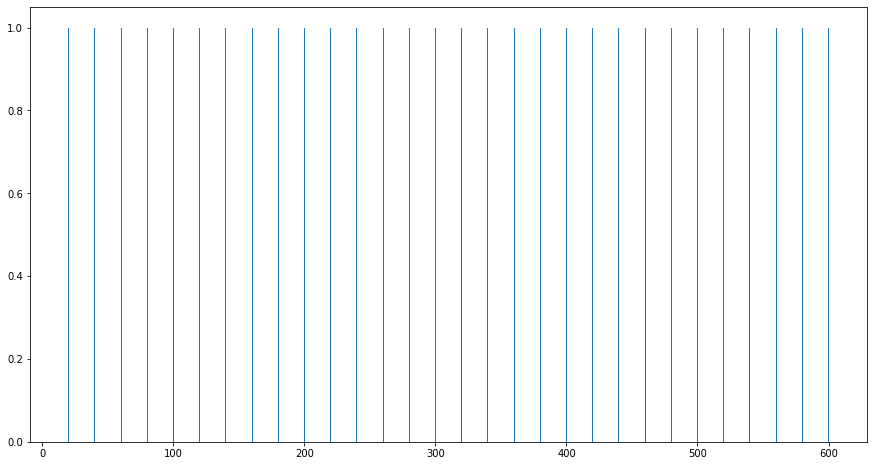

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.bar(cutoff, citynum)

<BarContainer object of 30 artists>

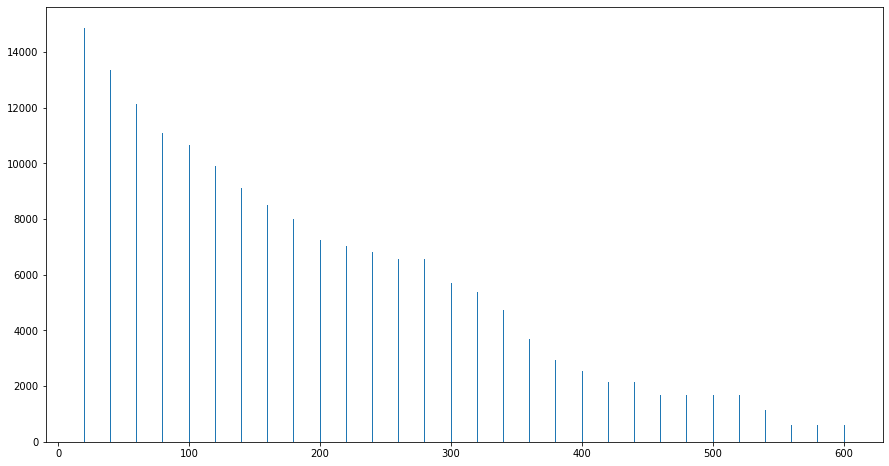

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.bar(cutoff, samplesize)

In [73]:
dftest = df_uscities[df_uscities['city'].map(df_uscities['city'].value_counts()) < 290]
dftest2 = dftest[dftest['city'].map(dftest['city'].value_counts()) > 50]
dftest2['city'].value_counts()

Minneapolis       288
Brooklyn          283
Detroit           245
San Diego         231
Las Vegas         205
Salt Lake City    200
Charlotte         200
Columbus          200
St Louis          182
Phoenix           170
Baltimore         163
Indianapolis      161
Kansas City       154
Hollywood         152
Orlando           151
Cleveland         149
Pittsburgh        137
New Orleans       135
Santa Ana         132
Louisville        125
Milwaukee         125
Raleigh           121
Sacramento        118
San Antonio       114
Oakland           106
Cincinnati        106
Anaheim           105
Tampa             105
Birmingham        102
Jacksonville       99
Cambridge          98
Grand Rapids       88
Richmond           87
Columbia           84
West Hollywood     79
Silver Spring      75
St. Paul           70
Omaha              69
Asbury Park        68
Albuquerque        68
Madison            67
Oklahoma City      66
Santa Cruz         66
Buffalo            65
Athens             65
Memphis   

In [ ]:
# filter dataframe by value_counts value
df1 = df[df['A'].map(df['A'].value_counts()) > 1]

In [ ]:
https://api.songkick.com/api/3.0/search/artists.json?apikey={your_api_key}&query={artist_name}

In [52]:
import json
import urllib.request

#url = 'https://api.songkick.com/api/3.0/artists/7338694/gigography.json?apikey=X72xzxKFdMGW54Vd&min_date=2018-01-01&max_date=2020-03-01'
#page = requests.get(url)
#soup = json.load(page.read())
#soup

url = 'https://api.songkick.com/api/3.0/artists/7338694/gigography.json?apikey=X72xzxKFdMGW54Vd&min_date=2018-01-01&max_date=2020-03-01&order=asc'
data = urllib.request.urlopen(url).read().decode()

obj = json.loads(data)

In [54]:
obj['resultsPage']['results']['event'][0]

{'type': 'Concert',
 'venue': {'displayName': 'Concord Music Hall',
  'lat': 41.9185623,
  'lng': -87.6900284,
  'uri': 'http://www.songkick.com/venues/2375994-concord-music-hall?utm_source=60064&utm_medium=partner',
  'metroArea': {'displayName': 'Chicago',
   'country': {'displayName': 'US'},
   'uri': 'http://www.songkick.com/metro_areas/9426-us-chicago?utm_source=60064&utm_medium=partner',
   'id': 9426,
   'state': {'displayName': 'IL'}},
  'id': 2375994},
 'status': 'ok',
 'performance': [{'billing': 'headline',
   'displayName': 'Kali Uchis',
   'artist': {'identifier': [{'href': 'http://api.songkick.com/api/3.0/artists/mbid:d0c7656d-8169-4f77-9dbe-b8f24e40105d.json',
      'mbid': 'd0c7656d-8169-4f77-9dbe-b8f24e40105d'}],
    'displayName': 'Kali Uchis',
    'uri': 'http://www.songkick.com/artists/7338694-kali-uchis?utm_source=60064&utm_medium=partner',
    'id': 7338694},
   'billingIndex': 1,
   'id': 61875144}],
 'popularity': 0.023972,
 'displayName': 'Kali Uchis at Concord

In [32]:
for i in obj['resultsPage']['results']['event'][0]:
    print(i)

type
venue
status
performance
popularity
displayName
start
ageRestriction
location
uri
id


In [51]:
for i in obj['resultsPage']['results']['event']:
    print(i['type'])

Concert
Concert
Concert
Concert
Concert
Concert
Concert
Concert
Concert
Concert
Concert
Concert
Concert
Concert
Concert
Festival
Concert
Concert
Festival
Concert
Festival
Festival
Concert
Concert
Concert
Festival
Festival
Festival
Concert
Festival
Festival
Festival
Concert
Festival
Concert
Concert
Concert
Concert
Concert
Concert
Concert
Concert
Concert
Concert
Concert
Festival
Concert
Concert
Concert
Concert


In [50]:

obj['resultsPage']['results']['event'][0]['type']

'Concert'

In [49]:
obj['resultsPage']['results']['event'][0]['location']['city']

'Chicago, IL, US'

In [36]:
obj['resultsPage']['results']['event'][0]['popularity']

0.023972

In [55]:
obj['resultsPage']['results']['event'][0]['start']['date']

'2018-01-13'

In [22]:
obj

{'resultsPage': {'status': 'ok',
  'results': {'event': [{'type': 'Concert',
     'venue': {'displayName': 'Concord Music Hall',
      'lat': 41.9185623,
      'lng': -87.6900284,
      'uri': 'http://www.songkick.com/venues/2375994-concord-music-hall?utm_source=60064&utm_medium=partner',
      'metroArea': {'displayName': 'Chicago',
       'country': {'displayName': 'US'},
       'uri': 'http://www.songkick.com/metro_areas/9426-us-chicago?utm_source=60064&utm_medium=partner',
       'id': 9426,
       'state': {'displayName': 'IL'}},
      'id': 2375994},
     'status': 'ok',
     'performance': [{'billing': 'headline',
       'displayName': 'Kali Uchis',
       'artist': {'identifier': [{'href': 'http://api.songkick.com/api/3.0/artists/mbid:d0c7656d-8169-4f77-9dbe-b8f24e40105d.json',
          'mbid': 'd0c7656d-8169-4f77-9dbe-b8f24e40105d'}],
        'displayName': 'Kali Uchis',
        'uri': 'http://www.songkick.com/artists/7338694-kali-uchis?utm_source=60064&utm_medium=partner',
 

In [ ]:
https://api.songkick.com/api/3.0/artists/{artist_id}/gigography.json?apikey={your_api_key}